# 서브플롯

Matplotlib를 사용하여 하나의 그래픽 영역을 나누어 두 개 이상의 시각화 결과물을 하나의 화면에서 표현할 수 있다.

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as plt

### [2] 그래프 전역 설정

In [10]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 5
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.unicode_minus"] = False

## #02. 서브플롯의 기본 사용

### [1] 서브플롯 영역 나누기

2행 3열을 갖는 서브플롯 영역을 구성한다.

`plt.subplots()` 메서드에 의해 리턴되는 `fig`는 그래픽 처리 기능을 제공하는 객체이다.

`plt.subplots()` 메서드에 의해 리턴되는 `ax`객체는 분할된 각 그래프 영역의 객체를 저장하고 있는 리스트이다.

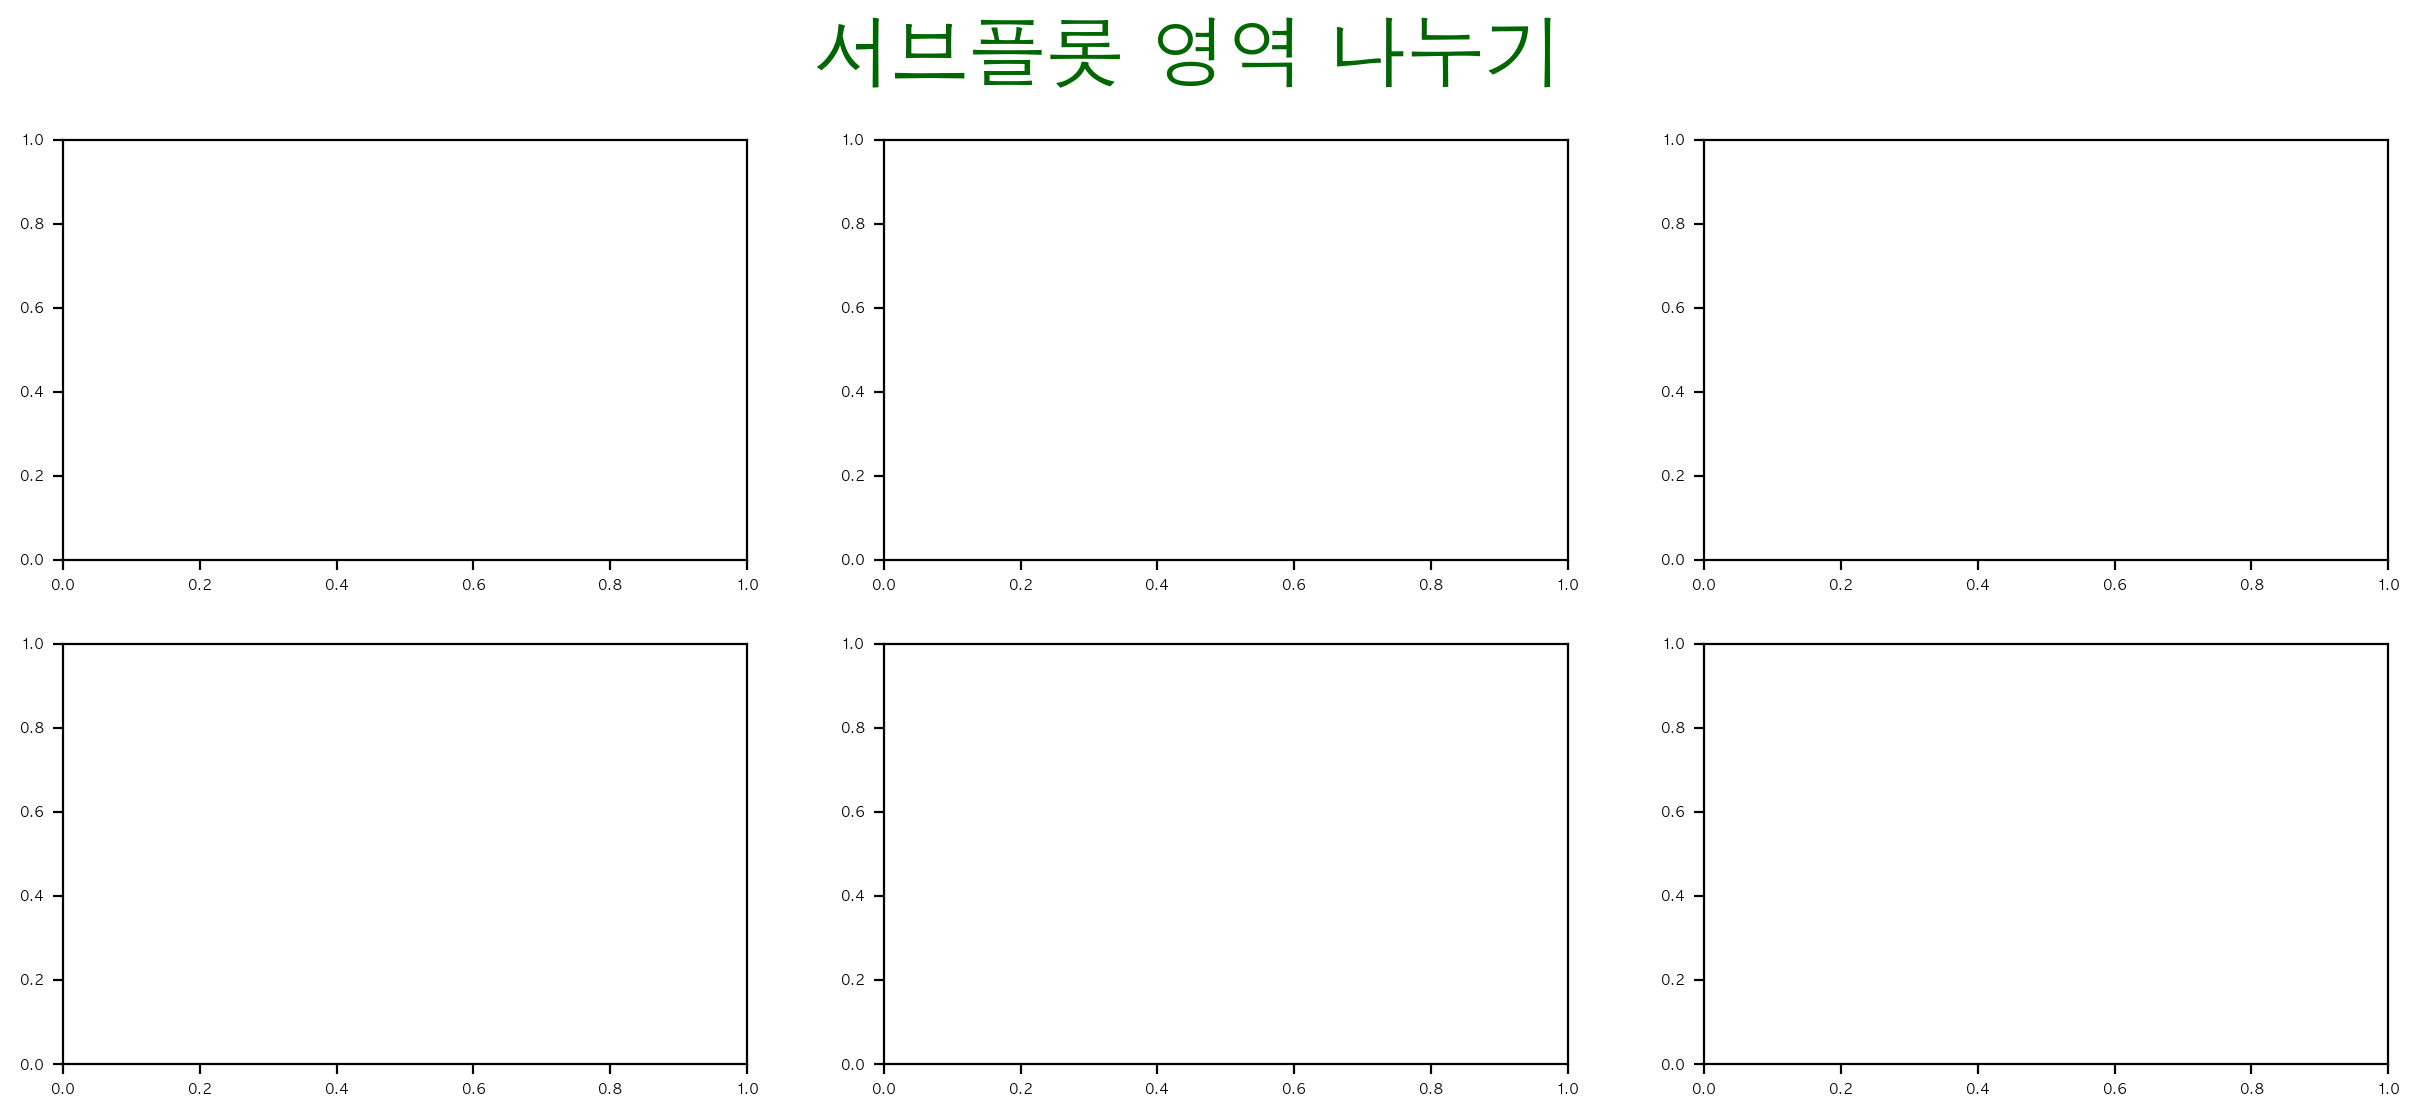

In [11]:
# 서브플롯 생성
fig, ax = plt.subplots(2, 3)

# 전체 제목
fig.suptitle('서브플롯 영역 나누기', fontsize=28, color='#006600')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.2)

plt.show()
plt.close()

### [2] 서브플롯에 그래프 그리기

2행 3열을 갖는 서브플롯 영역 안에 개별 그래프 표시하기

`plt.subplots()` 메서드의 결과로 `ax`에 반환되는 객체는 서브플롯의 행,열에 대한 리스트이다.

`plt.subplots()` 메서드에 전달하는 `figsize` 파라미터는 그래픽의 크기. plt.rcParams["figure.figsize"] 설정보다 우선한다.

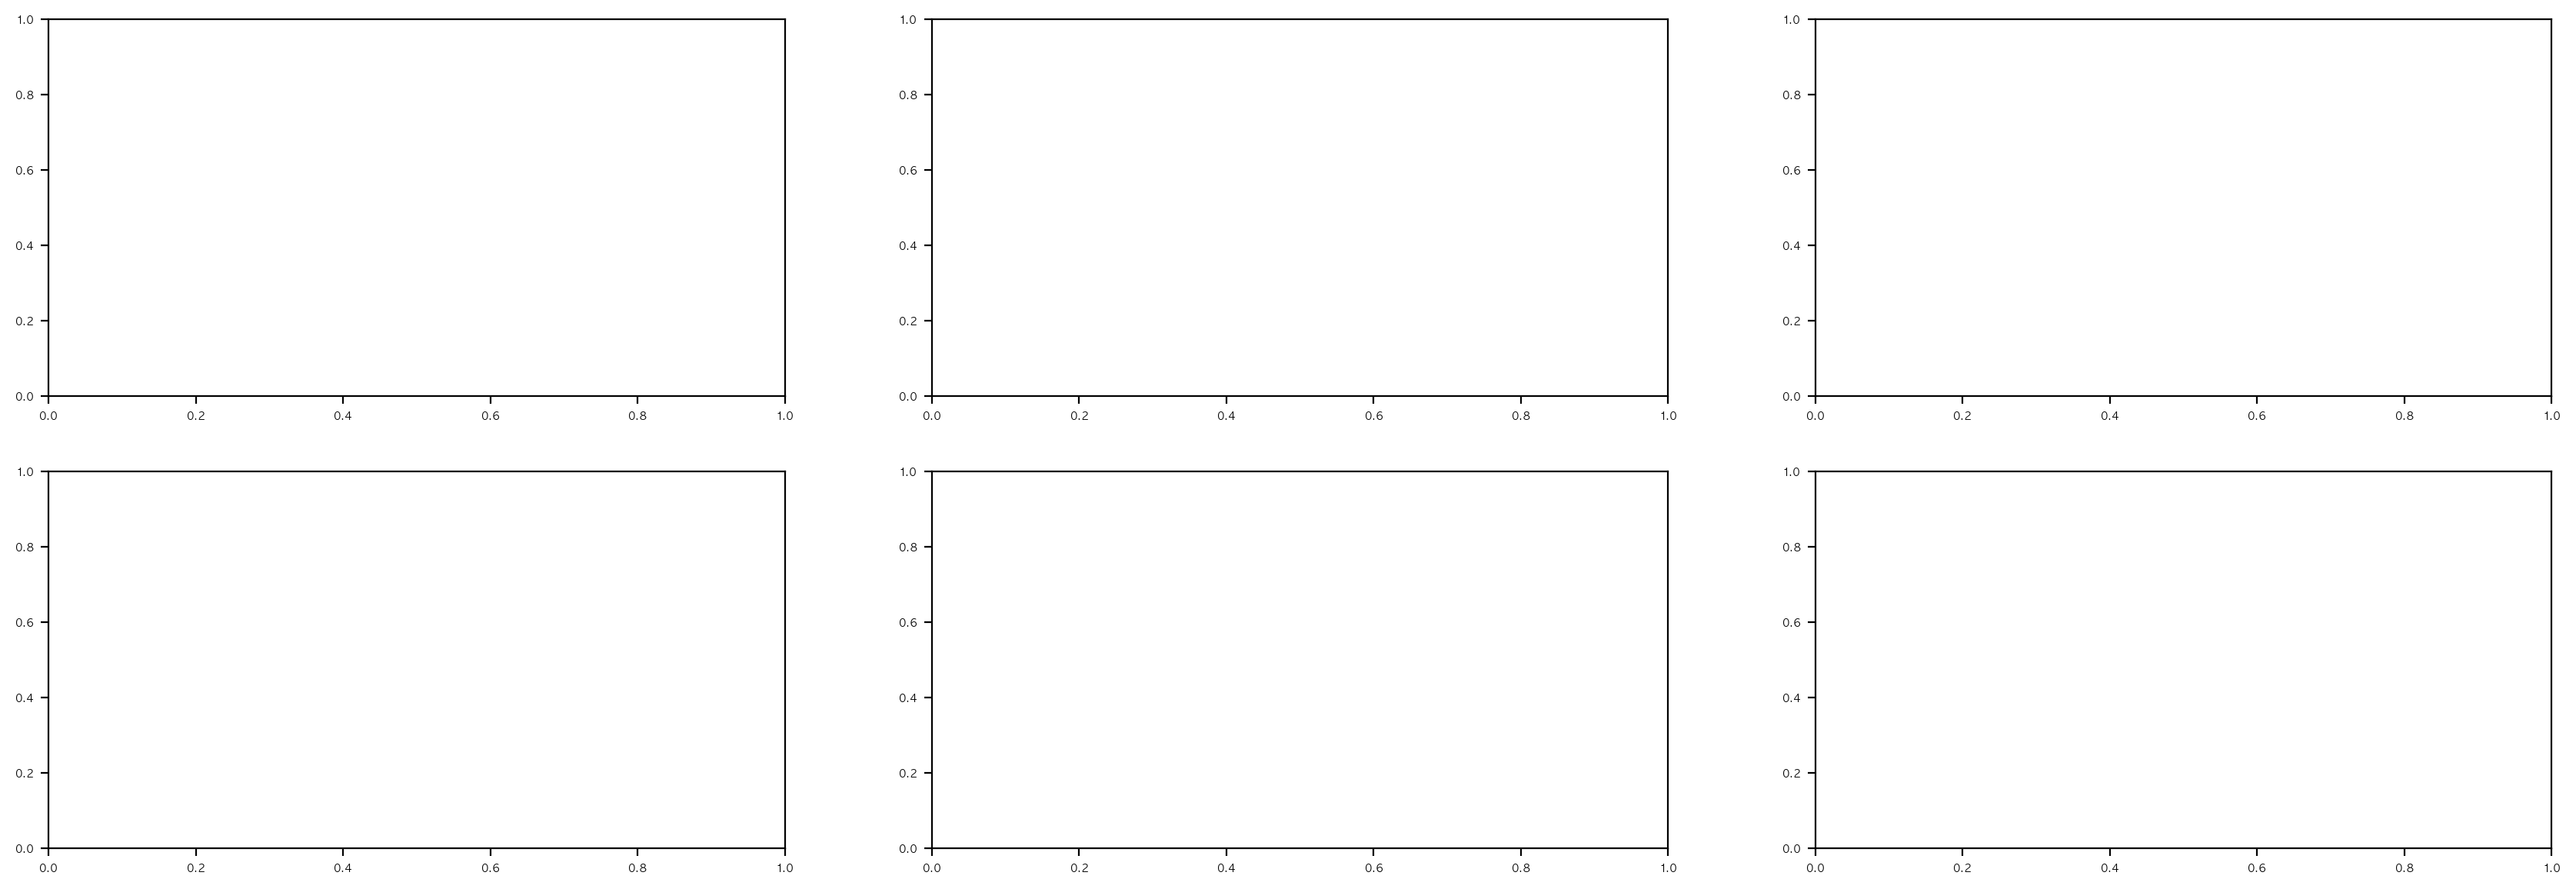

In [17]:
# 서브플롯 생성
fig, ax = plt.subplots(2, 3, figsize=(21, 7))


# 데이터프레임을 기반으로 각 영역에 그래프를 종류별로 표시
df.plot(ax=ax[0][0])                                     # 선
df.plot.bar(ax=ax[0][1])                                 # 막대
df['발생건수'].plot.pie(ax=ax[1][0])                     # 파이
df.plot.scatter(x='발생건수', y='부상자수', ax=ax[1][1]) # 산점도

# 그래프 출력하기
plt.show()
plt.close()

## #04. 서브플롯 영역에 옵션 지정하기

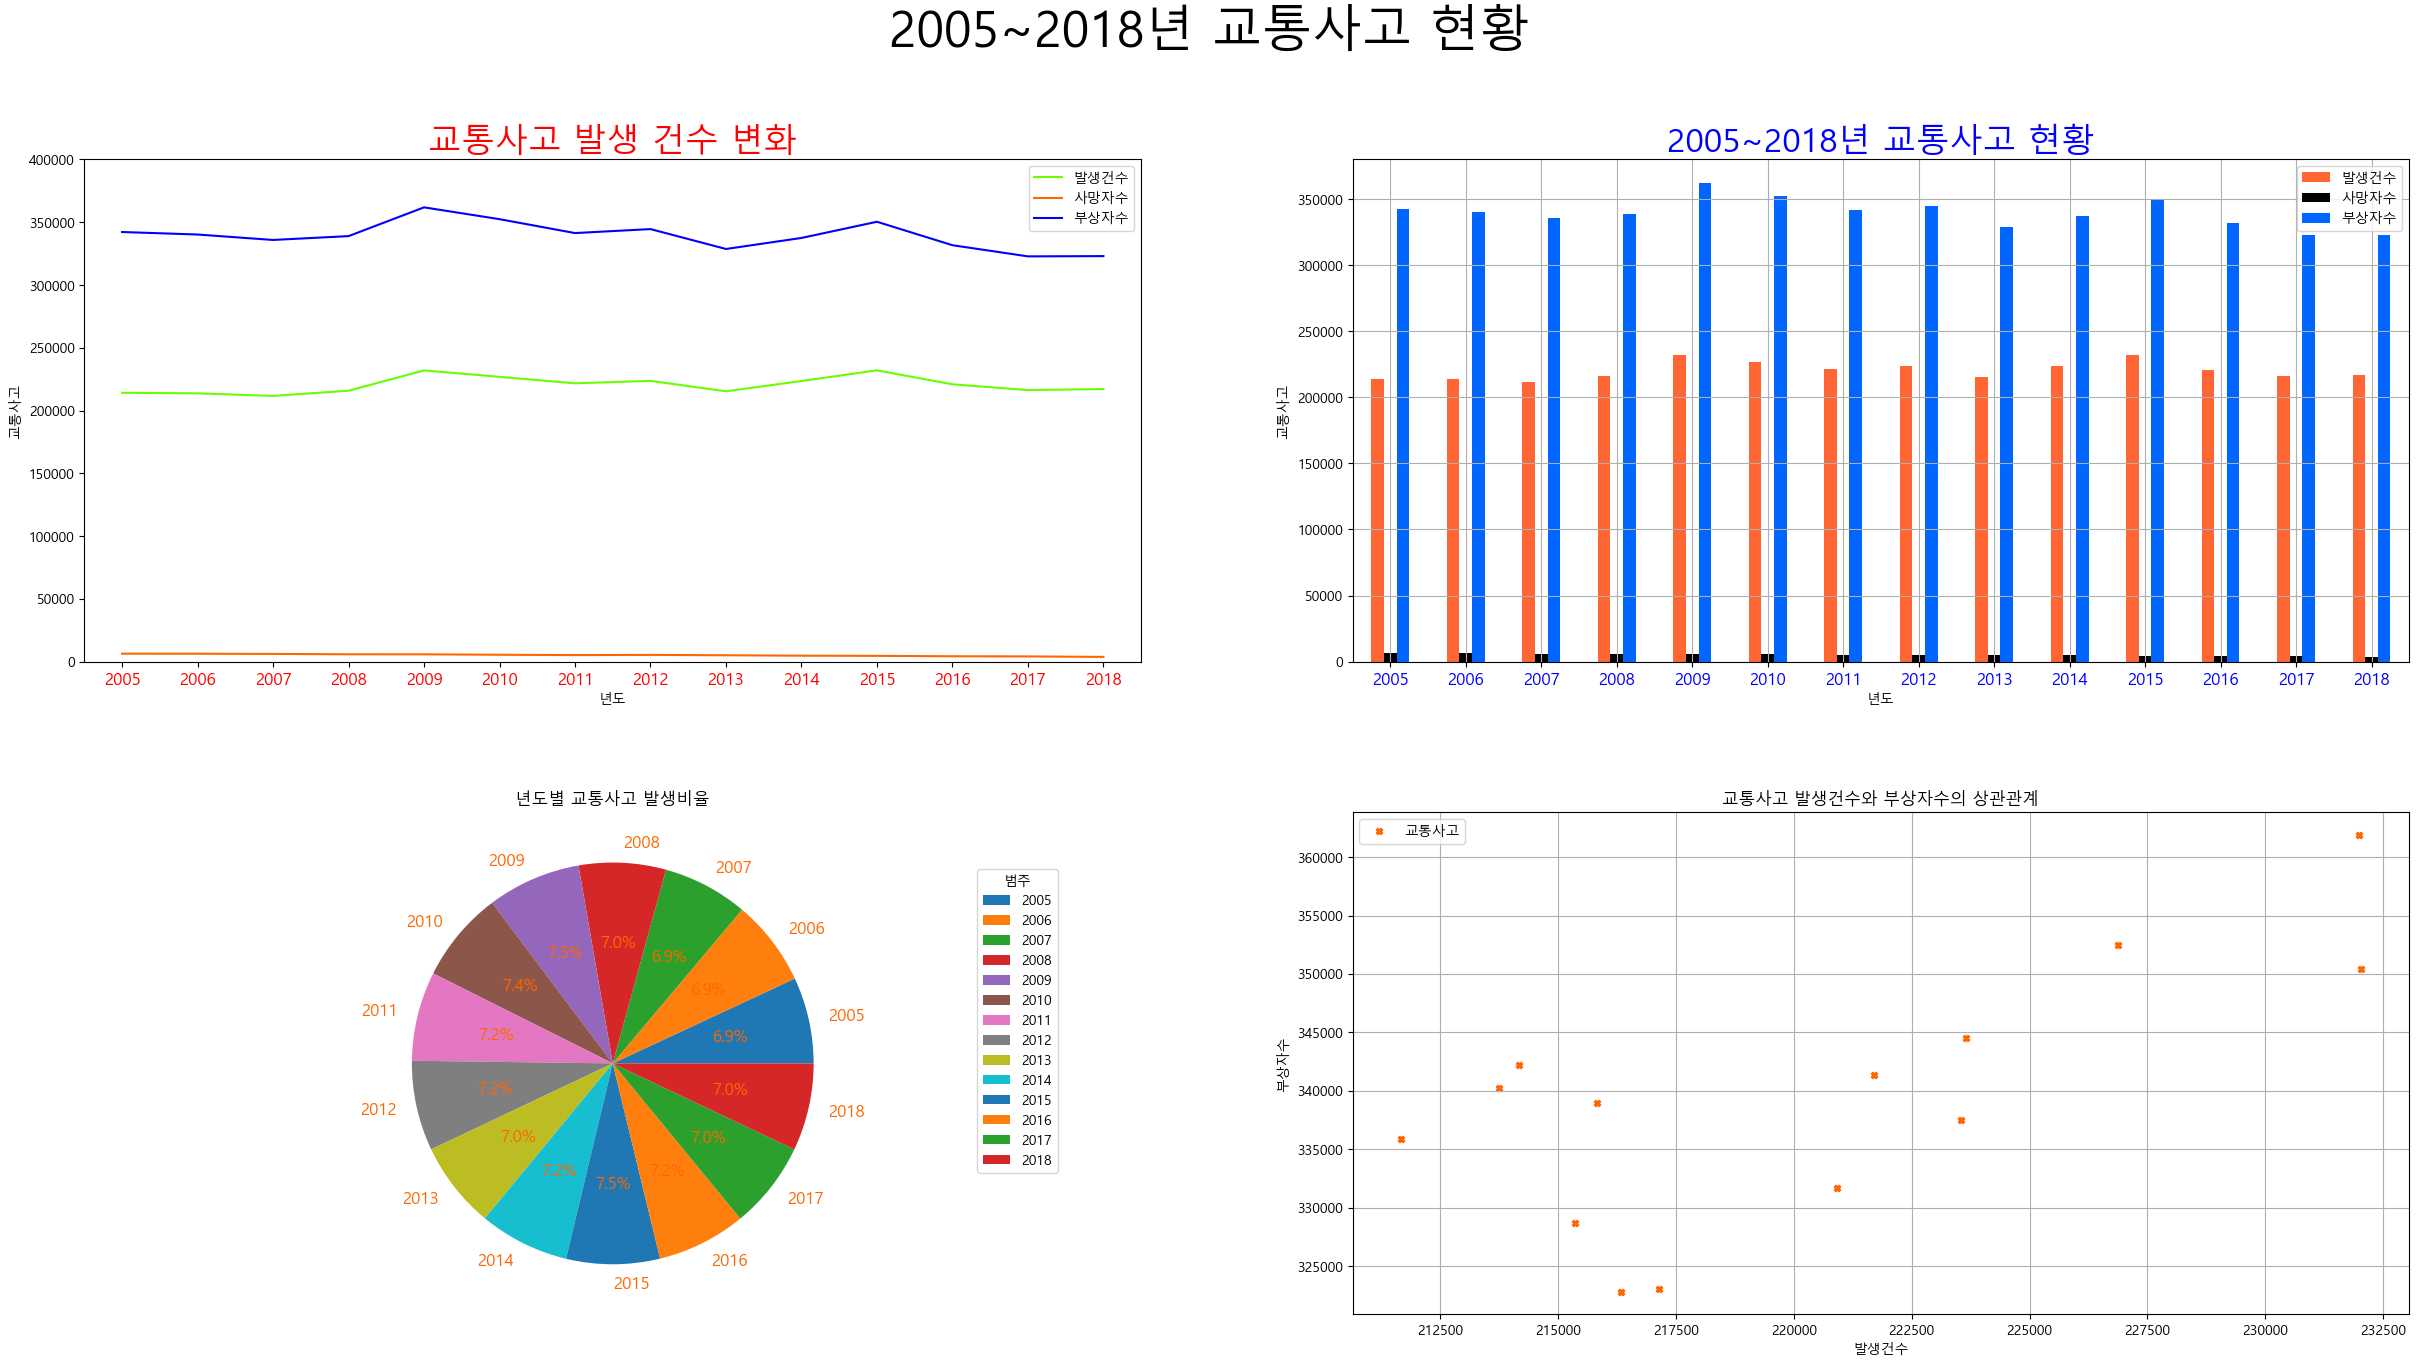

In [57]:
#--------------------------------------------------------------
# 2행 2열의 영역을 생성한다
#--------------------------------------------------------------
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 15))

# 전체 제목
fig.suptitle('2005~2018년 교통사고 현황', fontsize=36, color='#000000')

# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.3)

#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 년도별 교통사고에 대한 선 그래프
#--------------------------------------------------------------
df.plot(ax=ax1, color=['#66ff00', '#ff6600', '#0000ff'])

# 그래프 제목의 텍스트, 글자크기, 색상
ax1.title.set_text("교통사고 발생 건수 변화")
ax1.title.set_fontsize(24)
ax1.title.set_color('#ff0000')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax1.set(xlabel='년도', ylabel='교통사고')

# plt을 직접 사용할 경우 xticks(x축좌표, 표시할_텍스트) 형식으로 지정 하지만
# 서브플롯은 x축의 좌표와 표시할 텍스트를 나누어서 처리한다.
start = min(df.index)
end = max(df.index)
x = list(range(start, end+1))
# -> 좌표 설정
ax1.set_xticks(x)
# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax1.set_xticklabels(df.index, fontsize=12, color='#ff0000')

# x축, y축의 범위
ax1.set_xlim([start-0.5, end+0.5])
ax1.set_ylim([0, 400000])

#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 막대 그래프
#--------------------------------------------------------------
# 막대 그래프 표시
# -> x축의 텍스트가 90도로 표시되므로 rot 파라미터를 사용하여 0도로 재지정
# -> 데이터프레임의 각 컬럼에 대한 색상 지정
df.plot.bar(ax=ax2, rot=0, color=['#ff6633', '#000000', '#0066ff'])

# 배경 격자 표시
ax2.grid()

# 그래프 제목의 텍스트, 글자크기, 색상
ax2.title.set_text("2005~2018년 교통사고 현황")
ax2.title.set_fontsize(24)
ax2.title.set_color('#0000ff')

# x축의 좌표만 지정함 (막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax2.set_xticks(list(range(0, len(df.index))))

# 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax2.set_xticklabels(df.index, fontsize=12, color='#0000ff')

# x축과 y축의 라벨을 지정 (불필요한 부분은 생략 가능)
ax2.set(xlabel='년도', ylabel='교통사고')

#--------------------------------------------------------------
# 세 번째 영역 그래프 표시 -> 파이 그래프
#--------------------------------------------------------------
# 파이그래프
df['발생건수'].plot.pie(ax=ax3, labels=df.index, autopct="%0.1f%%",
                        textprops={'color':"#ff6600", 'fontsize': 12})

# 그래프 제목
ax3.title.set_text("년도별 교통사고 발생비율")

# 격자표시 --> 파이그래프인 경우는 표시 안됨
ax3.grid()

# y축 라벨이 불필요하므로 제거
ax3.set(ylabel=None)

# 범주 표시
ax3.legend(labels=df.index, title='범주', bbox_to_anchor=(1.4, 0.9))

#--------------------------------------------------------------
# 네 번째 영역 그래프 표시 -> 산점도 그래프
#--------------------------------------------------------------
# 산점도 그래프
df.plot.scatter(ax=ax4, x='발생건수', y='부상자수', color='#ff6600', marker='X', label='교통사고')

# 그래프 제목 지정
ax4.title.set_text("교통사고 발생건수와 부상자수의 상관관계")

# 배경 격자
ax4.grid()

# x축,y축 라벨
ax4.set(xlabel='발생건수', ylabel='부상자수')

#--------------------------------------------------------------
# 그래프 출력하기
#--------------------------------------------------------------
plt.show()
plt.close()

## #05. 두 개의 y축을 갖는 그래프

### 1) 샘플 데이터 만들기

#### x축 데이터 (공용)

In [59]:
x = list(range(0, 10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### 첫 번째 y축 데이터

In [79]:
y1 = list(range(0, 10, 1))
y1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### 두 번째 y축 데이터

In [82]:
y2 = list(np.arange(0, 5, 0.5))
y2

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

### 2) 기본 그래프 구현

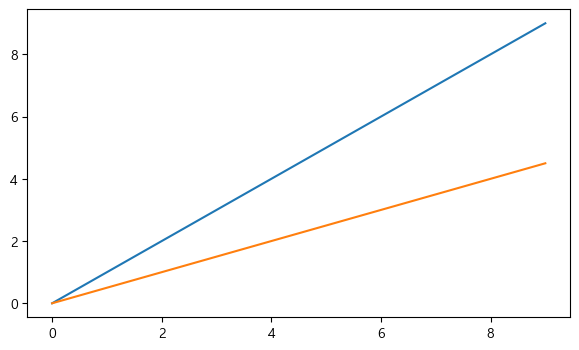

In [83]:
plt.rcParams["figure.figsize"] = (7, 4)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()
plt.close()

### 2) 서브플롯으로 2개의 y축을 갖는 그래프 구현

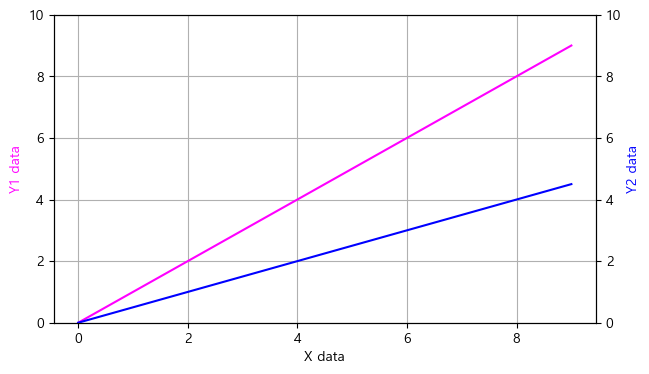

In [85]:
# 그래프 시작
fig, ax1 = plt.subplots(1,1, figsize=(7, 4))

# ax1에 겹쳐지는 쌍둥이 서브플롯을 생성
ax2 = ax1.twinx()

# ax1에 그래프 그리기
ax1.plot(x, y1, color="#ff00ff")
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='#ff00ff')
ax1.grid()
ax1.set_ylim([0, 10])

# ax2에 그래프 그리기
ax2.plot(x, y2, color="#0000ff")
ax2.set_ylabel('Y2 data', color='#0000ff')
ax2.set_ylim([0, 10])

plt.show()
plt.close()

## 06. (예제) 교통사고 발생건수와 사망자수 변화 시각화하기

우리나라는 2008년도에 자동차안전기준에 관한 규칙 일부개정령(안) 을 개정한 이후 꾸준히 교통사고안전기준을 강화해 왔다.

이러한 노력이 교통사고 부상자수를 줄이는데 효과가 있었는지 알아보자.

#### 그래프 그리기

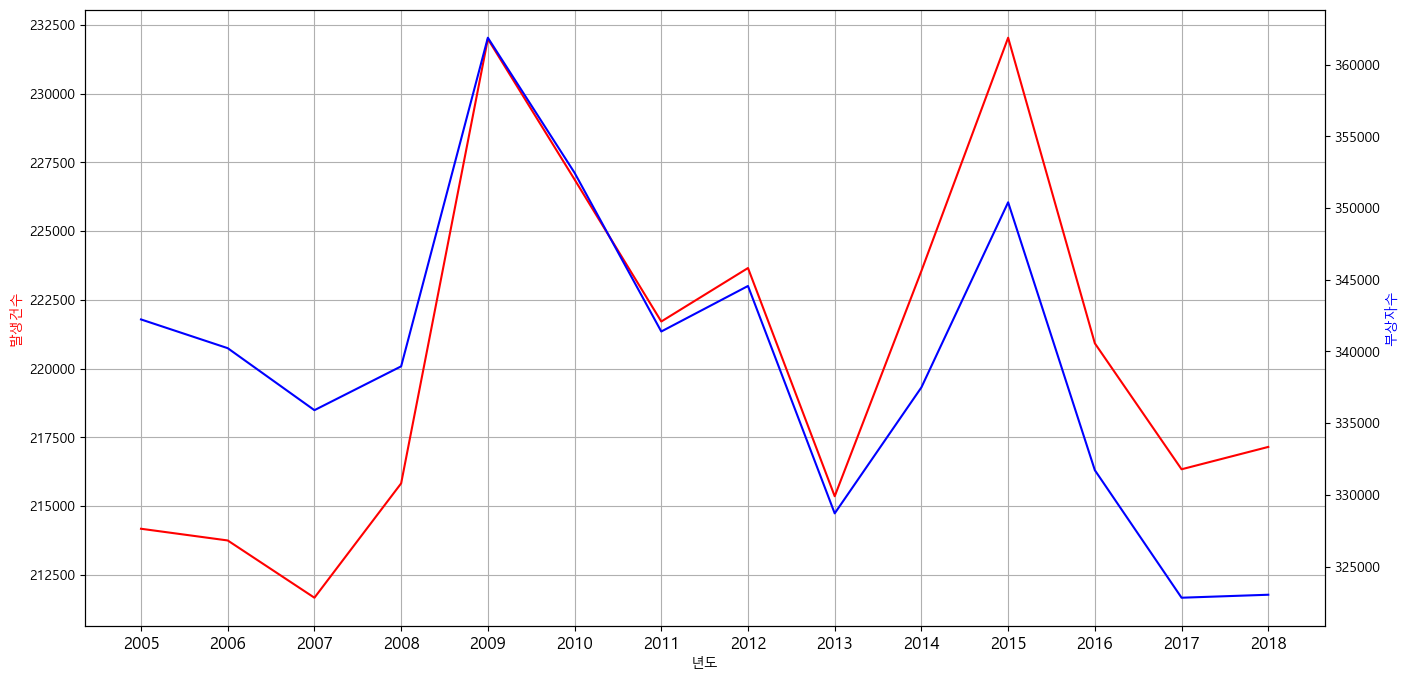

In [86]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))   # 그래프 시작
ax2 = ax1.twinx()             # ax1에 겹쳐지는 서브플롯 생성

# ax1에 그래프 그리기
df['발생건수'].plot(ax=ax1, color='#ff0000')
ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수', color='#ff0000')
ax1.grid()

# x축 좌표위의 텍스트 처리
start = min(df.index);
end = max(df.index)
ax1.set_xticks(list(range(start, end+1)))
ax1.set_xticklabels(df.index, fontsize=12, color='#000000')

# ax2에 그래프 그리기
df['부상자수'].plot(ax=ax2, color='#0000ff')
ax2.set_ylabel('부상자수', color='#0000ff')

plt.show()
plt.close()